<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Deep_Learning_using_Tensorflow/blob/main/C2_4_Multiclass_Classification_Convets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-02-06 13:58:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   134MB/s    in 1.4s    

2021-02-06 13:58:06 (134 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-02-06 13:58:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/

In [2]:
import os
import zipfile

local_zip="/tmp/rps.zip"
zip=zipfile.ZipFile(local_zip,"r")
zip.extractall("/tmp")
zip.close()

local_zip="/tmp/rps-test-set.zip"
zip=zipfile.ZipFile(local_zip,"r")
zip.extractall("/tmp")
zip.close()

In [3]:
rock_dir="/tmp/rps/rock"
paper_dir="/tmp/rps/paper"
scissors_dir="/tmp/rps/scissors"

rock_files=os.listdir(rock_dir)
paper_files=os.listdir(paper_dir)
scissors_files=os.listdir(scissors_dir)


In [4]:
print(rock_files[:10],paper_files[:10],scissors_files[:10])

['rock01-118.png', 'rock01-061.png', 'rock03-103.png', 'rock07-k03-101.png', 'rock03-013.png', 'rock03-077.png', 'rock04-071.png', 'rock05ck01-118.png', 'rock07-k03-002.png', 'rock02-035.png'] ['paper07-048.png', 'paper02-017.png', 'paper06-108.png', 'paper02-032.png', 'paper03-113.png', 'paper04-014.png', 'paper04-119.png', 'paper01-088.png', 'paper06-067.png', 'paper04-037.png'] ['scissors03-084.png', 'testscissors01-028.png', 'scissors04-035.png', 'scissors04-054.png', 'scissors03-118.png', 'testscissors03-045.png', 'scissors04-076.png', 'testscissors02-010.png', 'testscissors03-034.png', 'scissors02-070.png']


In [5]:
import tensorflow as tf
model=tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256,activation="relu"),
  tf.keras.layers.Dense(3,activation="softmax")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_preprocessing
from keras_preprocessing import image

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [11]:
history=model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=20,epochs=15,validation_steps=3,verbose=1)

Epoch 1/15
20/20 [==============================] - 19s 950ms/step - loss: 0.3554 - accuracy: 0.8738 - val_loss: 0.2656 - val_accuracy: 0.8468
Epoch 2/15
20/20 [==============================] - 19s 958ms/step - loss: 0.3392 - accuracy: 0.8853 - val_loss: 0.1505 - val_accuracy: 0.9677
Epoch 3/15
20/20 [==============================] - 19s 948ms/step - loss: 0.2420 - accuracy: 0.9163 - val_loss: 0.1584 - val_accuracy: 0.9220
Epoch 4/15
20/20 [==============================] - 19s 946ms/step - loss: 0.2016 - accuracy: 0.9349 - val_loss: 0.1811 - val_accuracy: 0.9140
Epoch 5/15
20/20 [==============================] - 19s 953ms/step - loss: 0.1934 - accuracy: 0.9341 - val_loss: 0.1846 - val_accuracy: 0.9220
Epoch 6/15
20/20 [==============================] - 19s 950ms/step - loss: 0.1668 - accuracy: 0.9480 - val_loss: 0.2531 - val_accuracy: 0.8656
Epoch 7/15
20/20 [==============================] - 19s 950ms/step - loss: 0.1931 - accuracy: 0.9369 - val_loss: 0.2080 - val_accuracy: 0.8978

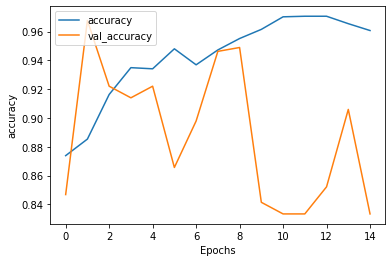

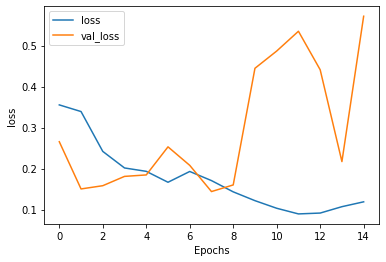

In [12]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")